<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 2</p><br>

## 1. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [1]:
myDate = "2022-10-01 09:42:43"


In [84]:
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from pytz import timezone
import matplotlib.pyplot as plt
import numpy as np

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [3]:
format_date="%Y-%m-%d %H:%M:%S"
date=datetime.strptime(myDate,format_date)
def convert_time(time,zone):
    
    return time.astimezone(timezone(zone))


In [4]:
convert_time(date,'Asia/Tehran')

datetime.datetime(2022, 10, 1, 9, 42, 43, tzinfo=<DstTzInfo 'Asia/Tehran' +0330+3:30:00 STD>)

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [5]:
def Month_day(date):
    return (date.strftime('%A'),date.strftime('%B'),date.strftime('%Y'))

In [6]:
Month_day(date)

('Saturday', 'October', '2022')

c. What weekday and the month is it after exactly 100 years from `myDate`?

In [7]:
def shift_time(date,days):
    date=date+timedelta(days=days)
    return Month_day(date)

In [8]:
shift_time(date,100)

('Monday', 'January', '2023')

d. Add two month with myDate and display the resulting date time.

In [9]:
shift_time(date,60)


('Wednesday', 'November', '2022')

e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [10]:
def get_seconds():
    now=datetime.now()
    diff=(datetime.strptime('Dec/23/2022','%b/%d/%Y'))-now
    return (diff.total_seconds(),diff.total_seconds()/3600)

In [11]:
get_seconds()

(15776.742274, 4.382428409444445)

f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [12]:
! pip install isoweek 

In [13]:
from isoweek import Week

In [14]:
def last_week(date):
    return (Week.last_week_of_year(date).week,date)

In [15]:
date1=last_week(2021)
date2=last_week(2022)
print(date1,date2,'max is ',max(date1,date2))


(52, 2021) (52, 2022) max is  (52, 2022)


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [16]:
def make_date(year,days):
    date=datetime(year,1,1)+timedelta(days)
    return Month_day(date)

h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [17]:

    
date=datetime.strptime('2022-10-20','%Y-%m-%d')
date2=datetime.strftime(date,'%m-%d-%Y')


i. Find if the Date on the question above is the weekend or a weekday.

In [18]:
date3=datetime.strptime(date2,'%m-%d-%Y').weekday()
if date3<5:
    print('weekday')
else:
    print('weekend')


weekday


## 2. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [19]:
df_fuel=pd.read_csv('walmart_fuel_prices.csv')
df_sales=pd.read_csv('walmart_sales.csv')
df_fuel.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday
0,1,1,2010-02-05,42.31,2.572,False
1,2,1,2010-02-12,38.51,2.548,True
2,3,1,2010-02-19,39.93,2.514,False
3,4,1,2010-02-26,46.63,2.561,False
4,5,1,2010-03-05,46.50,2.625,False


 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [20]:
def str_to_date(df,column):
    df[column]=pd.to_datetime(df[column],format='%Y-%m-%d')
    df['year']=df[column].dt.year
    df['Month']=df[column].dt.month
    df['Day']=df[column].dt.day


In [21]:
df_fuel['Date']=pd.to_datetime(df_fuel['Date'],format='%Y-%m-%d')
df_fuel['year']=df_fuel['Date'].dt.year
df_fuel['Month']=df_fuel['Date'].dt.month
df_fuel['Day']=df_fuel['Date'].dt.day


In [22]:
str_to_date(df_fuel,'Date')
str_to_date(df_sales,'Date')

In [23]:
df_sales.year.unique()

array([2010, 2011, 2012])

In [24]:
df_fuel.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday,year,Month,Day
0,1,1,2010-02-05,42.31,2.572,False,2010,2,5
1,2,1,2010-02-12,38.51,2.548,True,2010,2,12
2,3,1,2010-02-19,39.93,2.514,False,2010,2,19
3,4,1,2010-02-26,46.63,2.561,False,2010,2,26
4,5,1,2010-03-05,46.50,2.625,False,2010,3,5


b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [25]:
high_sales=df_sales.groupby(['Month','year']).sum()
index=high_sales.Weekly_Sales.idxmax()

print(high_sales.loc[index].Weekly_Sales,'month is ',index[0],'year is ',index[1])


288760532.72 month is  12 year is  2010


c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [26]:
average_sales=df_sales.groupby(['Dept','Month','Store']).mean()
for i in df_sales.Dept.unique() :
    index_m=average_sales.loc[i].Weekly_Sales.idxmax()
    print('Dept is ',i,'month is ',index_m[0],'store is',index_m[1])



Dept is  1 month is  12 store is 13
Dept is  2 month is  2 store is 10
Dept is  3 month is  8 store is 10
Dept is  4 month is  11 store is 4
Dept is  5 month is  12 store is 10
Dept is  6 month is  12 store is 20
Dept is  7 month is  12 store is 10
Dept is  8 month is  2 store is 10
Dept is  9 month is  6 store is 23
Dept is  10 month is  6 store is 6
Dept is  11 month is  6 store is 23
Dept is  12 month is  3 store is 1
Dept is  13 month is  9 store is 4
Dept is  14 month is  12 store is 10
Dept is  16 month is  6 store is 14
Dept is  17 month is  12 store is 23
Dept is  18 month is  12 store is 10
Dept is  19 month is  10 store is 17
Dept is  20 month is  2 store is 10
Dept is  21 month is  12 store is 20
Dept is  22 month is  12 store is 10
Dept is  23 month is  12 store is 10
Dept is  24 month is  12 store is 10
Dept is  25 month is  12 store is 10
Dept is  26 month is  11 store is 10
Dept is  27 month is  12 store is 10
Dept is  28 month is  12 store is 10
Dept is  29 month is  12

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [27]:
#!pip install holidays

In [28]:
import holidays

In [29]:
def get_holiday(highest):
    year=int(highest[1])
    for ptr in holidays.USA(years = year).items():
        if ptr[0].month==highest[0]:
            print(ptr)

In [30]:

def get_highest_month(year):
    highest=high_sales.loc[(slice(None),year),:].Weekly_Sales.idxmax()
    print(highest)
    return get_holiday(highest)

در سال ۲۰۱۱ در ماه ۱۲ بالاترین فروش بوده است که دارای ۲ تعطیلی است 
اما در سال ۲۰۱۲ ماه ۶ ام بالاترین فروش بوده است که تعطیلی نبوده است

In [31]:
get_highest_month(2011.0)

(12, 2011)
(datetime.date(2011, 12, 25), 'Christmas Day')
(datetime.date(2011, 12, 26), 'Christmas Day (Observed)')


In [32]:
get_highest_month(2012.0)

(6, 2012)


 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [45]:
def holidays_finder(year):
    
    all_holidays=[ptr[0].month for ptr in holidays.USA(years=year).items()]
    return list(set(all_holidays))

In [49]:
def get_lowest_month(year):
    verified_months=holidays_finder(year)
    lowest=high_sales.loc[(verified_months,year),:].Weekly_Sales.idxmin()
    print('month is ',lowest[0])
    return get_holiday(lowest)
    

In [50]:
get_lowest_month(2011)

month is  1
(datetime.date(2011, 1, 1), "New Year's Day")
(datetime.date(2011, 1, 17), 'Martin Luther King Jr. Day')


/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_1440/1083967510.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lowest=high_sales.loc[(verified_months,year),:].Weekly_Sales.idxmin()


In [52]:
get_lowest_month(2012)

month is  1
(datetime.date(2012, 1, 1), "New Year's Day")
(datetime.date(2012, 1, 2), "New Year's Day (Observed)")
(datetime.date(2012, 1, 16), 'Martin Luther King Jr. Day')


/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_1440/1083967510.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lowest=high_sales.loc[(verified_months,year),:].Weekly_Sales.idxmin()


در هر ۲ سال ماه اول بوده است

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Store'>

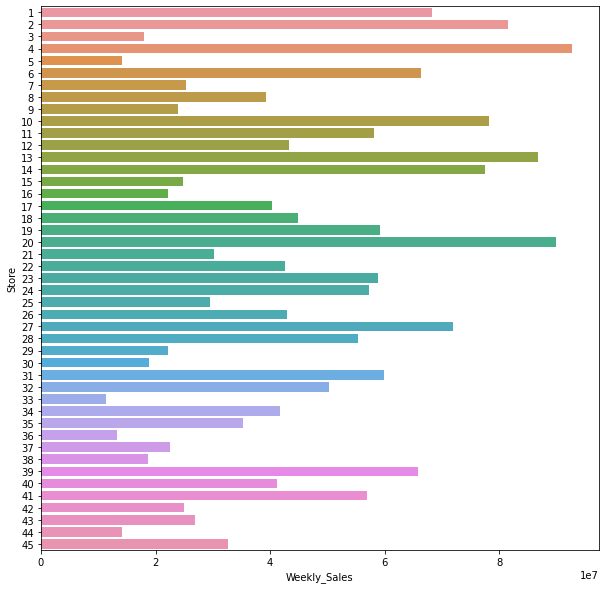

In [67]:
store_sales=df_sales.groupby(['Store','year'],as_index=False).sum()
store_sales=store_sales.loc[store_sales['year']==2012]
plt.figure(figsize=(10,10))
store_sales=store_sales.loc[:,['Store','Weekly_Sales']]

sns.barplot(store_sales,x='Weekly_Sales',y='Store',orient='h')

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

<AxesSubplot:xlabel='Temperature', ylabel='Fuel_Price'>

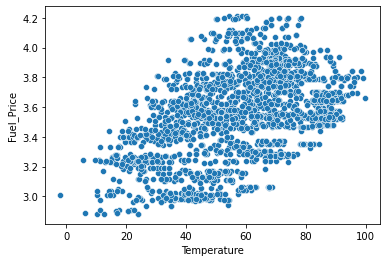

In [ ]:
df_fuel_price=df_fuel.loc[df_fuel['year']==2011]
df_fuel_price=df_fuel_price.loc[:,['Temperature','Fuel_Price']]
sns.scatterplot(df_fuel_price,x='Temperature',y='Fuel_Price')

باتوجه به نمودار باید گفت ارتباط مستقیم وجود دارد

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [ ]:
df=df_fuel.merge(df_sales,how='inner',on=['Date','Store'])
df_2010=df.loc[df['year_x']==2010]
lowest=df_2010.sort_values('Fuel_Price').head(1)

highest=df_2010[df_2010['Month_y']==2].sort_values('Fuel_Price',ascending=False).head(1)
highest


,index,Store,Date,Temperature,Fuel_Price,IsHoliday_x,year_x,Month_x,Day_x,Dept,Weekly_Sales,IsHoliday_y,year_y,Month_y,Day_y
391065,7463,42,2010-02-05,54.34,2.962,False,2010,2,5,7,522.44,False,2010,2,5


In [ ]:
print(lowest)
print(highest)

        index  Store       Date  Temperature  Fuel_Price  IsHoliday_x  year_x  \
340379   6373     36 2010-02-19        45.66       2.472        False    2010   

        Month_x  Day_x  Dept  Weekly_Sales  IsHoliday_y  year_y  Month_y  \
340379        2     19    46       2805.71        False    2010        2   

        Day_y  
340379     19  
        index  Store       Date  Temperature  Fuel_Price  IsHoliday_x  year_x  \
391065   7463     42 2010-02-05        54.34       2.962        False    2010   

        Month_x  Day_x  Dept  Weekly_Sales  IsHoliday_y  year_y  Month_y  \
391065        2      5     7        522.44        False    2010        2   

        Day_y  
391065      5  


i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [ ]:
# TODO

## 3. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



In [69]:
df=pd.read_csv('time_series_covid19_confirmed_US.csv')
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,18752,18752,18752,18847,18847,18847,18847,18847,18847,18847
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,66951,66951,66951,67221,67221,67221,67221,67221,67221,67221
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,6989,6989,6989,7007,7007,7007,7007,7007,7007,7007
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,7653,7653,7653,7668,7668,7668,7668,7668,7668,7668
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,17559,17559,17559,17648,17648,17648,17648,17648,17648,17648


a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [70]:
Neb=df.loc[df['Province_State']=='Nebraska']
Neb.loc[:,['Admin2','10/30/20']]

,Admin2,10/30/20
1718,Adams,912
1719,Antelope,173
1720,Arthur,5
1721,Banner,4
1722,Blaine,3
...,...,...
1808,Washington,532
1809,Wayne,369
1810,Webster,123
1811,Wheeler,3


b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


In [119]:
df.iloc[0,11:]

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
12/16/22    18847
12/17/22    18847
12/18/22    18847
12/19/22    18847
12/20/22    18847
Name: 0, Length: 1064, dtype: object

In [185]:
df_new=df.copy()
df_per_day=df_new.iloc[:,11:]



In [189]:
def case_per_day(df):
    
    return np.diff(df)

c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [193]:
for i in range(0,3342):
    df_per_day.iloc[i,2:]=case_per_day(df_per_day.iloc[i,1:])


In [194]:
df_per_day

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/11/22,12/12/22,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,95,-190,95,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,270,-540,270,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,18,-36,18,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,15,-30,15,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,89,-178,89,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,0,0,0,0,0,0,0,0,0,0,...,0,0,21,-42,21,0,0,0,0,29
3338,0,0,0,0,0,0,0,0,0,0,...,0,0,15,-30,15,0,0,0,0,16
3339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,0,0,0,0,0,0,0,0,0,0,...,0,0,16,-32,16,0,0,0,0,0


d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


In [ ]:
# TODO

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [ ]:
# TODO